<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Projeto_Final/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conceitos obrigatorios

Pré-Processamento
NANs
Outliers


Engenharia de atributos
codificação de categorias
Dimensionamento de caracteristicas
seleção de atributos


Tunning
Registrar mudanças na performance do modelo
mostrar o que foi mudado no projeto  a cada etapa e demonstrar resultados (sugestão: tabela)


Utilizar principais metricas

publicar codigo do seu projeto



#Informations about the dataset:
https://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Bonus information
fnlwgt = Peso final(final weigth), representa quantas pessoas na população aquele registro representa.


https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

 artigo sobre esta base de dados


In [ ]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
url_treino = 'https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/train.csv'
url_test = 'https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/test.csv'
ulr_validation = 'https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/validation.csv'



#Importações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
df_treino = pd.read_csv(url_treino)
df_teste = pd.read_csv(url_test)

#Análise exploratória

In [ ]:
df_treino.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,188767,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
1,64,Private,286732,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,17,United-States,<=50K
2,29,Private,253801,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Ecuador,<=50K
3,28,Private,334032,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
4,22,Private,173004,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,Black,Male,0,0,1,United-States,<=50K


In [ ]:
df_treino.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.689988,1.895613e+05,10.080903,1082.911229,89.585832,40.436310
std,13.741874,1.055642e+05,2.572400,7505.749147,407.092898,12.445302
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176740e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779370e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              34189 non-null  int64 
 1   workclass        34189 non-null  object
 2   fnlwgt           34189 non-null  int64 
 3   education        34189 non-null  object
 4   educational-num  34189 non-null  int64 
 5   marital-status   34189 non-null  object
 6   occupation       34189 non-null  object
 7   relationship     34189 non-null  object
 8   race             34189 non-null  object
 9   gender           34189 non-null  object
 10  capital-gain     34189 non-null  int64 
 11  capital-loss     34189 non-null  int64 
 12  hours-per-week   34189 non-null  int64 
 13  native-country   34189 non-null  object
 14  income           34189 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [ ]:
colunas = df_treino.columns
quantidades = [df_treino[col].isna().sum() for col in colunas]

dicionario_contagem = dict(zip(colunas, quantidades))
print(dicionario_contagem)

{'age': np.int64(0), 'workclass': np.int64(0), 'fnlwgt': np.int64(0), 'education': np.int64(0), 'educational-num': np.int64(0), 'marital-status': np.int64(0), 'occupation': np.int64(0), 'relationship': np.int64(0), 'race': np.int64(0), 'gender': np.int64(0), 'capital-gain': np.int64(0), 'capital-loss': np.int64(0), 'hours-per-week': np.int64(0), 'native-country': np.int64(0), 'income': np.int64(0)}


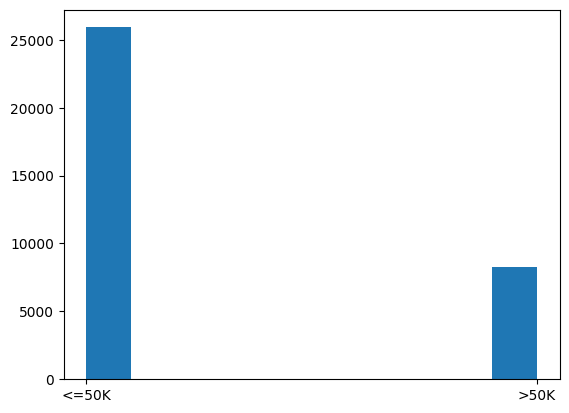

Quantidade Value counts income
<=50K    25922
>50K      8267
Name: count, dtype: int64


In [ ]:
#Verificaremos se estamos lidando com dados desbalanceados

plt.hist(df_treino['income'])
plt.show()


print("Quantidade Value counts", df_treino['income'].value_counts())

 #Sim estamos

#Tratamento para desbalanceamento


In [ ]:
colunas = df_treino.columns

In [ ]:
x = df_treino.iloc[:,:-1].values
y = df_treino['income'].values

In [ ]:
encoder = LabelEncoder()

for i in range(x.shape[1]):
  if x[:,i].dtype == 'object':
    x[:,i] = encoder.fit_transform(x[:,i])

In [ ]:

sm = SMOTENC(random_state = 0, categorical_features = [1,3,5,6,7,8,9,13])
x_res, y_res = sm.fit_resample(x,y)

In [ ]:
df_treino.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,188767,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
1,64,Private,286732,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,17,United-States,<=50K
2,29,Private,253801,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Ecuador,<=50K
3,28,Private,334032,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
4,22,Private,173004,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,Black,Male,0,0,1,United-States,<=50K


#Outliers


In [ ]:
df_treino.replace('?', np.nan, inplace=True)

In [ ]:
df_treino.isnull().sum()

,0
age,0
workclass,1969
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,1977
relationship,0
race,0
gender,0


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_treino['workclass'] = imputer.fit_transform(df_treino[['workclass']]).ravel()
df_treino['occupation'] = imputer.fit_transform(df_treino[['occupation']]).ravel()
df_treino['native-country'] = imputer.fit_transform(df_treino[['native-country']]).ravel()

In [ ]:
df_treino.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df_treino.duplicated().sum()

np.int64(23)

In [ ]:
df_treino.drop_duplicates(inplace=True)

In [ ]:
df_treino.duplicated().sum()

np.int64(0)

In [ ]:
df_treino.select_dtypes(include='number').head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,188767,9,0,0,40
1,64,286732,9,0,0,17
2,29,253801,9,0,0,40
3,28,334032,11,0,0,50
4,22,173004,9,0,0,1


<Axes: ylabel='fnlwgt'>

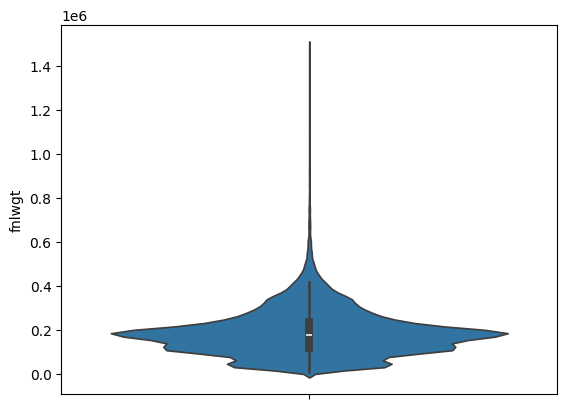

In [ ]:
sns.violinplot(df_treino['fnlwgt'])

<Axes: xlabel='age'>

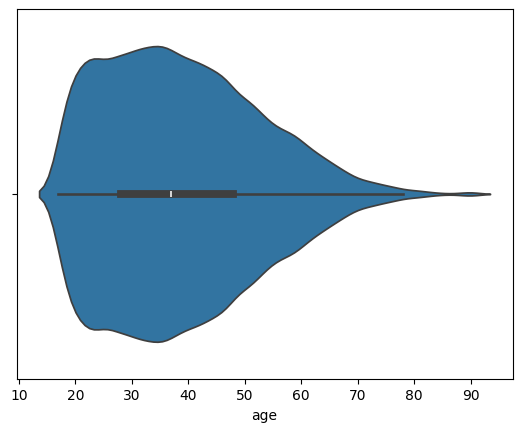

In [ ]:
sns.violinplot(df_treino, x=df_treino['age'])

<Axes: xlabel='age'>

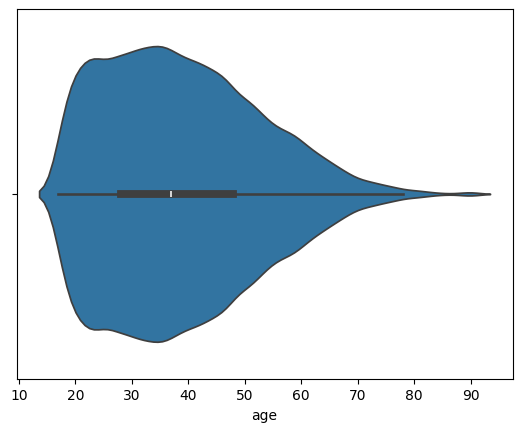

In [ ]:
sns.violinplot(df_treino, x=df_treino['age'])

<Axes: xlabel='educational-num'>

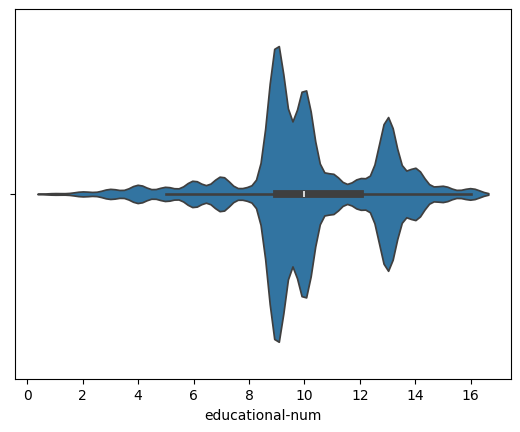

In [ ]:
sns.violinplot(df_treino, x=df_treino['educational-num'])

<Axes: xlabel='capital-loss'>

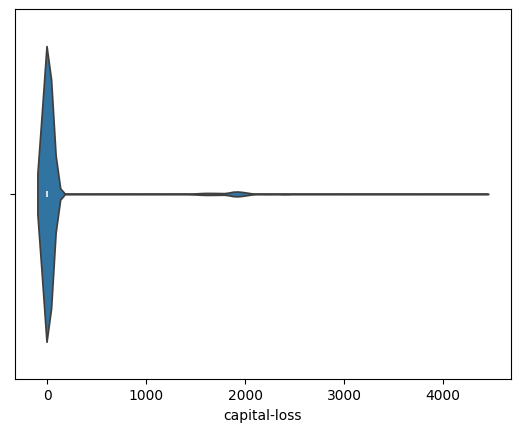

In [ ]:
sns.violinplot(df_treino, x=df_treino['capital-loss'])

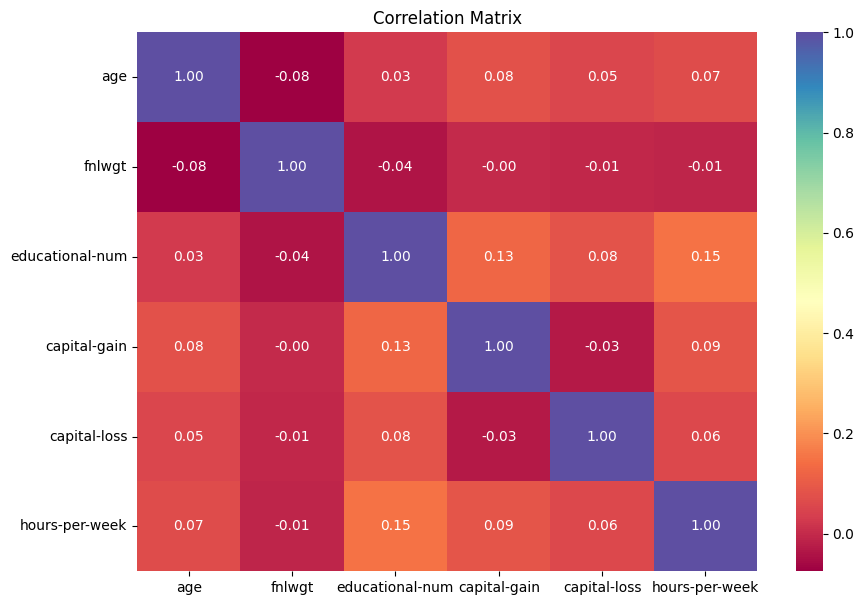

In [ ]:
#Como verifiquei que estamos provavelmente lidando com muitas escalas vou utilizar o describe para verificar quais os maximos e os minimos
plt.figure(figsize=(10, 7))
sns.heatmap(df_treino.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

# Anotações da correlação
###Temos níveis muito baixos para todas as variáveis então talves seja uma boa escolha usarmos PCA ou um modelo de clustering

In [ ]:
#Identificamos a quantidade de outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df[column]< lower) | (df[column]> upper)]

numerical_columns = ['age', 'fnlwgt']
for col in numerical_columns:
    outlier = outliers(df_treino, col)

In [ ]:
outlier.shape

(1019, 15)

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 #Interquartil
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df[column]> lower) & (df[column]< upper)]

In [ ]:
for cols in numerical_columns:
    df = remove_outliers(df_treino, cols)

#Visualization

In [ ]:

def plot_count(df, column, ordinal=True):
    """
    Gera um countplot para uma coluna de um DataFrame.
    Ajusta espaçamento dos valores no eixo X.
    """

    plt.figure(figsize=(20,6))  # aumenta largura

    if ordinal:
        order = sorted(df[column].dropna().unique())
    else:
        order = df[column].value_counts().index

    ax = sns.countplot(data=df, x=column, order=order, palette="viridis")

    # Adiciona valores acima das barras
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.title(f"Distribuição da coluna: {column}")
    plt.xlabel(column)
    plt.ylabel("Contagem")

    # Rotaciona e afasta os labels do eixo X
    plt.xticks(ha="right")
    plt.legend(labelspacing = 1.5)
    plt.tight_layout()  # evita sobreposição

    plt.show()


/tmp/ipython-input-4268639661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, order=order, palette="viridis")
/tmp/ipython-input-4268639661.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(labelspacing = 1.5)


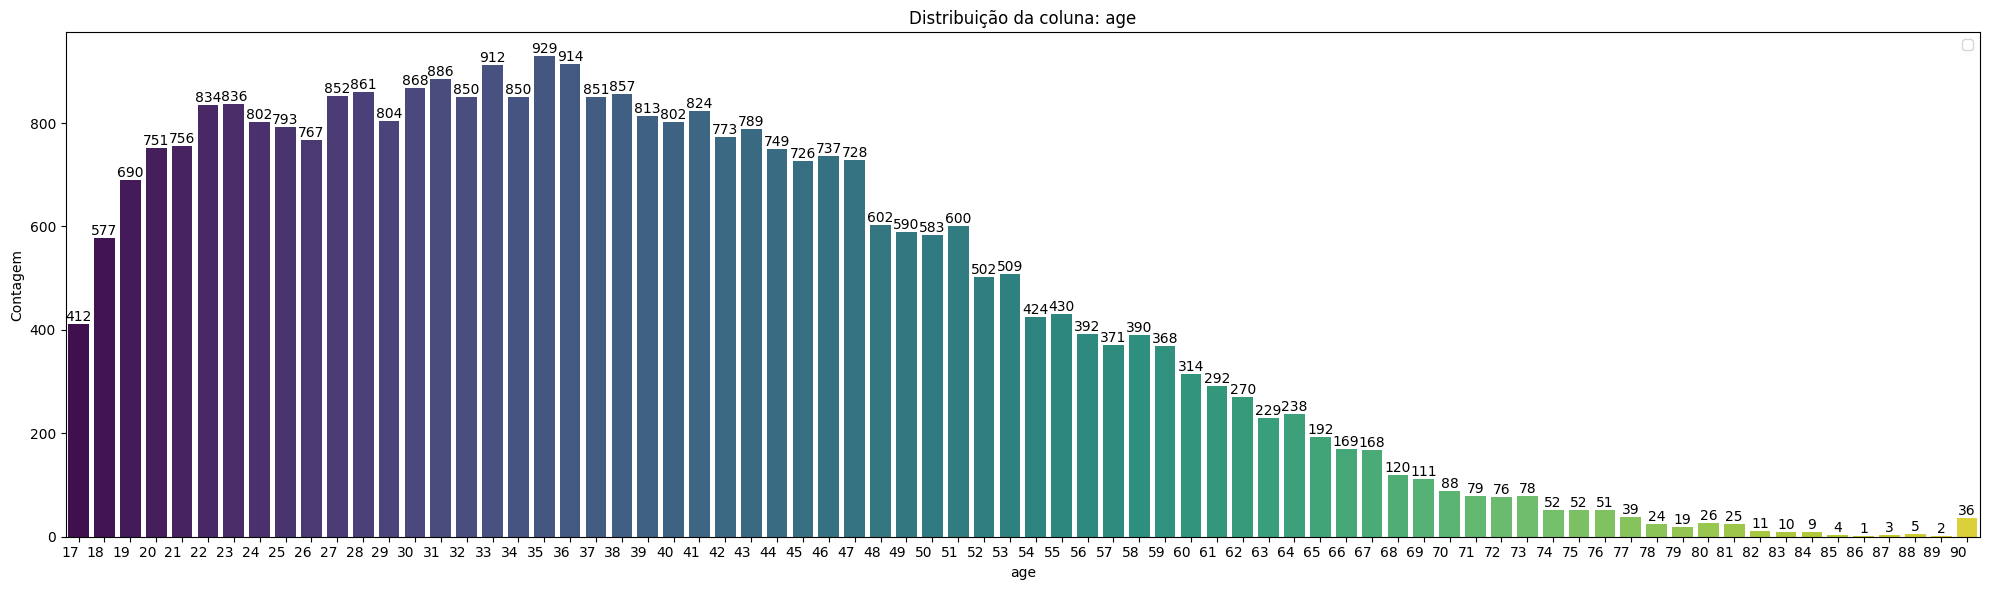

In [ ]:
plot_count(df, 'age', ordinal = True)

/tmp/ipython-input-4268639661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, order=order, palette="viridis")
/tmp/ipython-input-4268639661.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(labelspacing = 1.5)


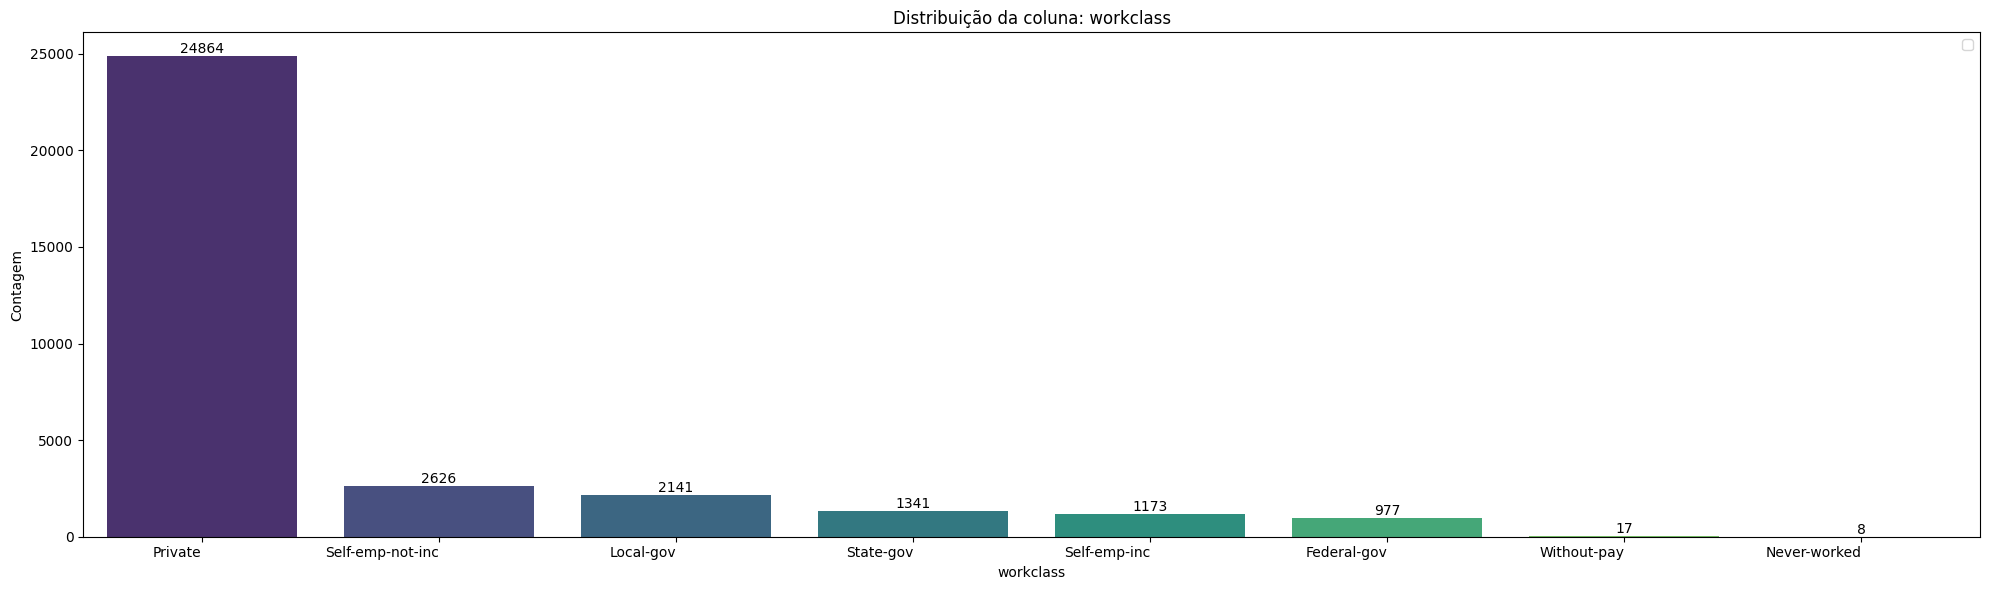

In [ ]:
plot_count(df, 'workclass', ordinal = False)

/tmp/ipython-input-4268639661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, order=order, palette="viridis")
/tmp/ipython-input-4268639661.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(labelspacing = 1.5)


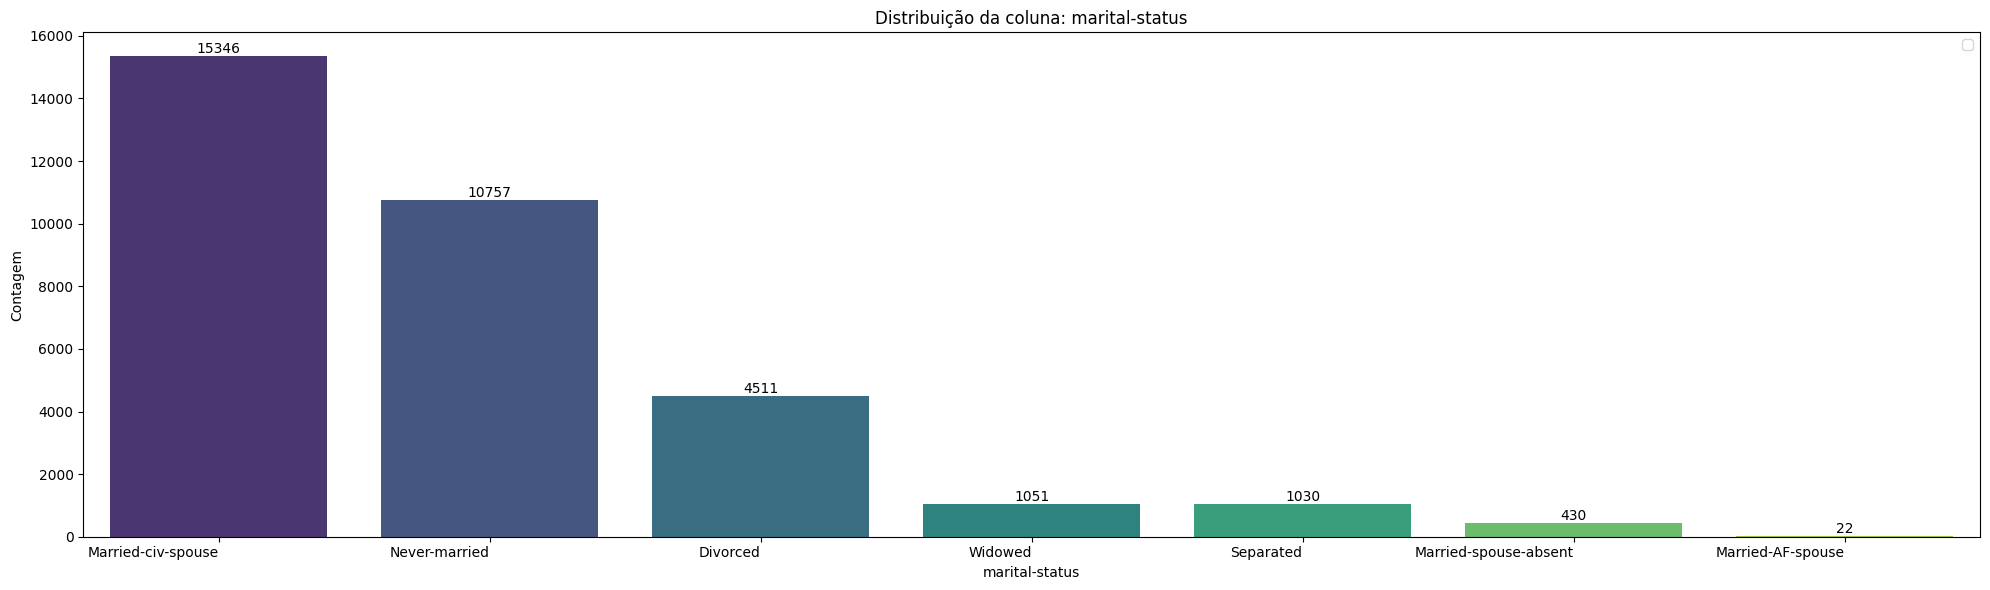

In [ ]:
plot_count(df, 'marital-status', ordinal = False)

/tmp/ipython-input-4268639661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, order=order, palette="viridis")
/tmp/ipython-input-4268639661.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(labelspacing = 1.5)


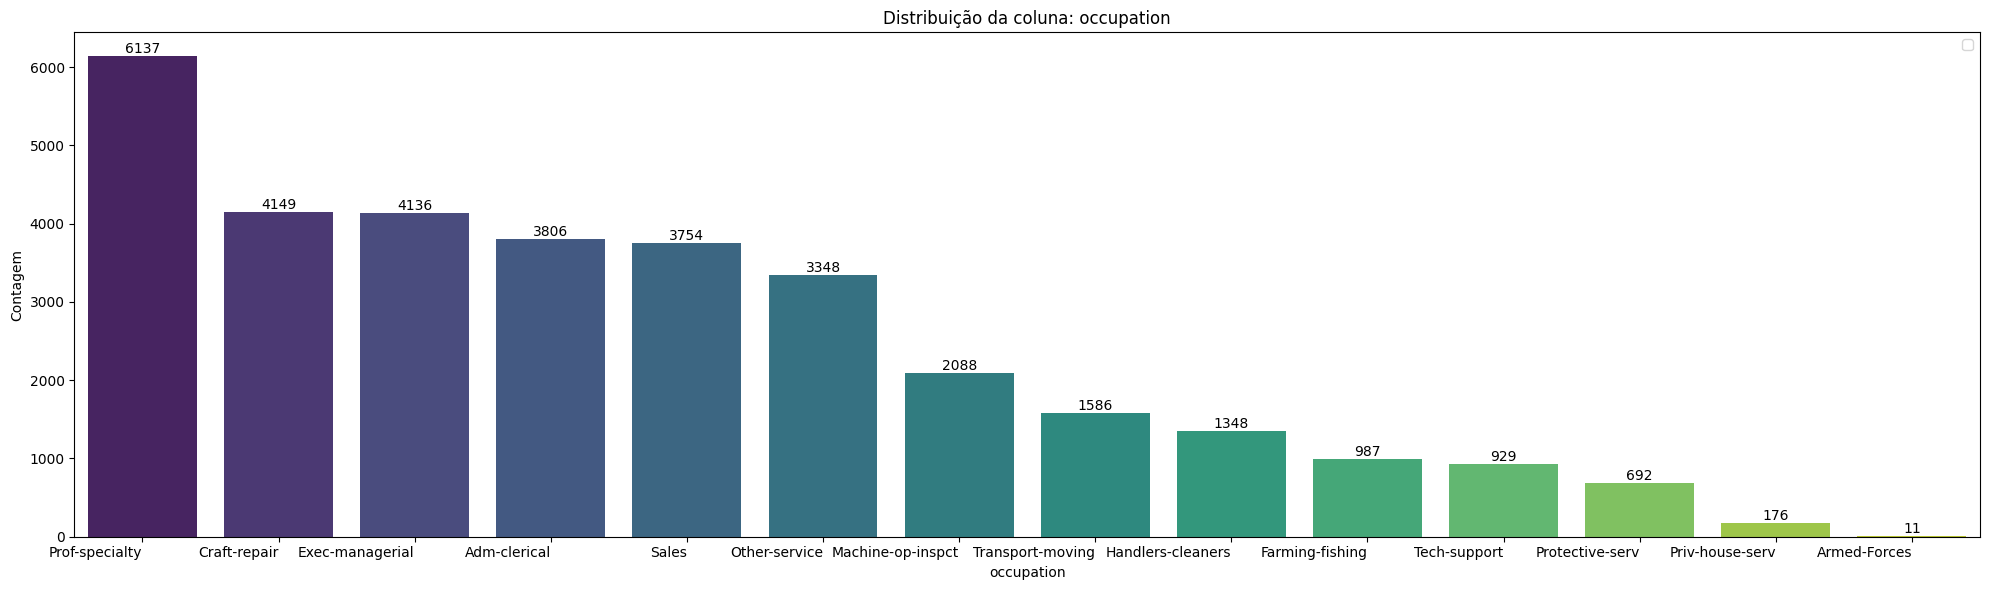

In [ ]:
plot_count(df, 'occupation', ordinal=False)

/tmp/ipython-input-4268639661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, order=order, palette="viridis")
/tmp/ipython-input-4268639661.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(labelspacing = 1.5)


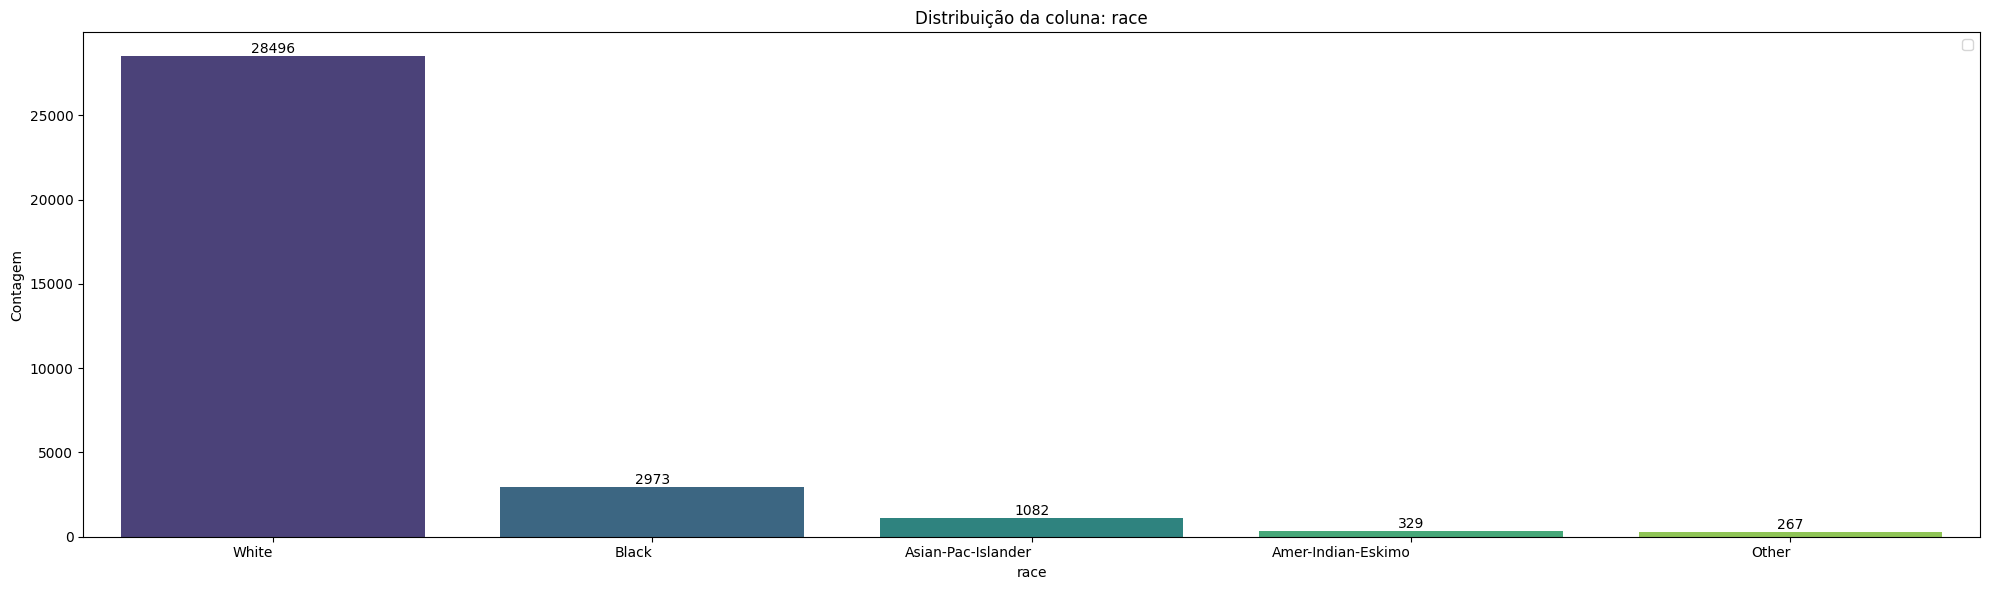

In [ ]:
plot_count(df, 'race', ordinal=False)

/tmp/ipython-input-4268639661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, order=order, palette="viridis")
/tmp/ipython-input-4268639661.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(labelspacing = 1.5)


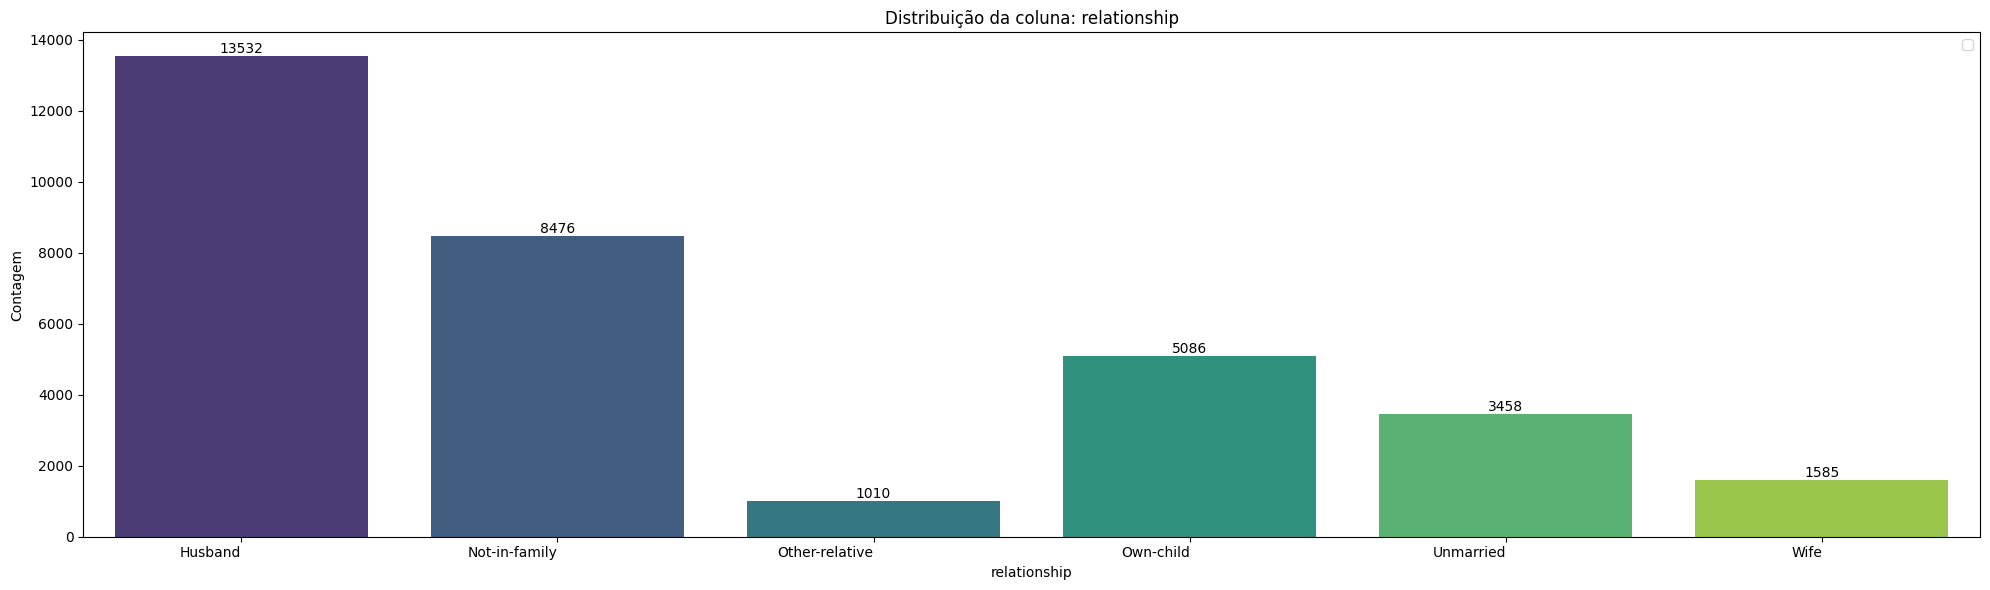

In [ ]:
plot_count(df,'relationship', ordinal =True)

#Pre processamento

In [ ]:
#Encoder cetegorical columns
lb=LabelEncoder()
df.workclass=lb.fit_transform(df.workclass)
df.education=lb.fit_transform(df.education)
df['marital-status']=lb.fit_transform(df['marital-status'])
df.occupation=lb.fit_transform(df.occupation)
df.relationship=lb.fit_transform(df.relationship)
df.race=lb.fit_transform(df.race)
df.gender=lb.fit_transform(df.gender)
df['native-country']=lb.fit_transform(df['native-country'])
df.income=lb.fit_transform(df.income)

#scaler
#X
X = df.drop('income',axis=1)
st=StandardScaler()

#y
y = df['income']

X_scalered=st.fit_transform(X)

/tmp/ipython-input-2091537918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.workclass=lb.fit_transform(df.workclass)
/tmp/ipython-input-2091537918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education=lb.fit_transform(df.education)
/tmp/ipython-input-2091537918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

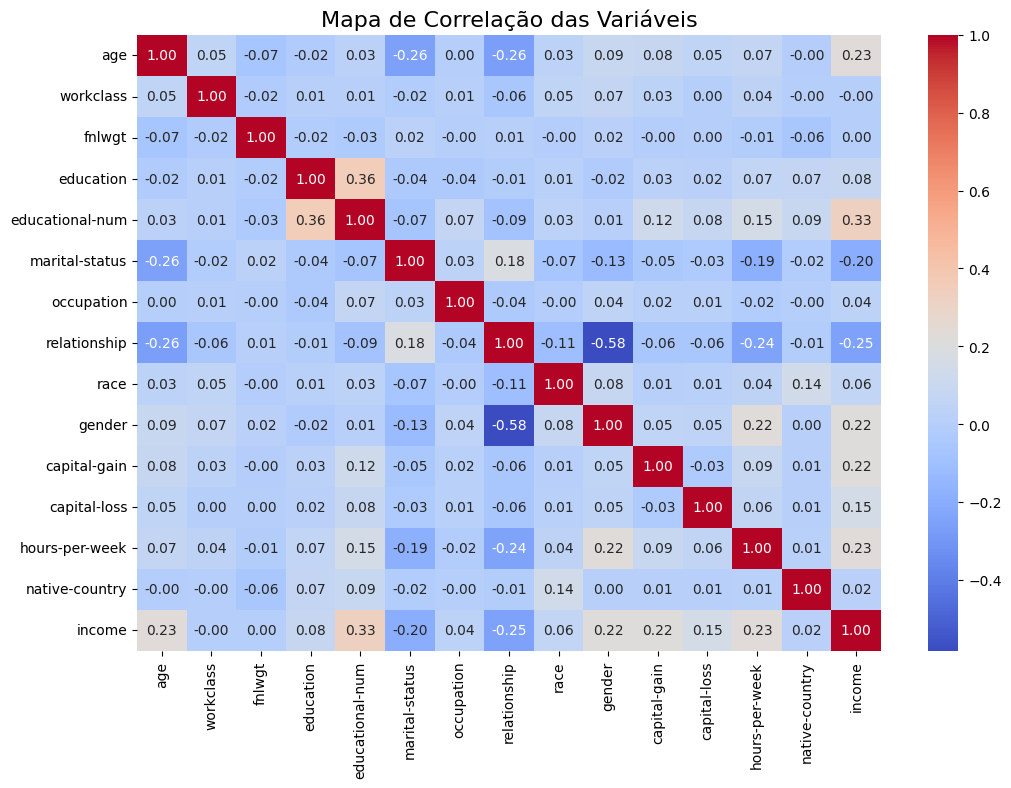

In [ ]:
corr = df.corr()
# Define o tamanho da figura
plt.figure(figsize=(12,8))

# Cria o heatmap
sns.heatmap(
    corr,
    annot=True,        # mostra os valores dentro das células
    fmt=".2f",         # formato dos números
    cmap="coolwarm",   # paleta de cores
    cbar=True          # barra lateral de intensidade
)

plt.title("Mapa de Correlação das Variáveis", fontsize=16)
plt.show()

In [ ]:
corr

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.048938,-0.068741,-0.022051,0.026430,-0.257756,0.001560,-0.263933,0.032040,0.089340,0.079102,0.050416,0.067342,-0.003753,0.229236
workclass,0.048938,1.000000,-0.023438,0.006544,0.005517,-0.019898,0.006800,-0.059043,0.050283,0.069419,0.029365,0.003389,0.038604,-0.000972,-0.000564
fnlwgt,-0.068741,-0.023438,1.000000,-0.017490,-0.031790,0.024875,-0.000705,0.006035,-0.002338,0.021293,-0.002671,0.000279,-0.010180,-0.055840,0.000113
education,-0.022051,0.006544,-0.017490,1.000000,0.355962,-0.037119,-0.038090,-0.010331,0.014760,-0.023492,0.027245,0.018943,0.065414,0.070045,0.080097
educational-num,0.026430,0.005517,-0.031790,0.355962,1.000000,-0.074785,0.067903,-0.087904,0.030893,0.009499,0.124300,0.084895,0.147990,0.085139,0.331980
marital-status,-0.257756,-0.019898,0.024875,-0.037119,-0.074785,1.000000,0.034247,0.184167,-0.068648,-0.131304,-0.045082,-0.029414,-0.188215,-0.016568,-0.197532
occupation,0.001560,0.006800,-0.000705,-0.038090,0.067903,0.034247,1.000000,-0.035539,-0.004960,0.041750,0.016106,0.014659,-0.015645,-0.000304,0.035325
relationship,-0.263933,-0.059043,0.006035,-0.010331,-0.087904,0.184167,-0.035539,1.000000,-0.112334,-0.582864,-0.056369,-0.056278,-0.244969,-0.010724,-0.251831
race,0.032040,0.050283,-0.002338,0.014760,0.030893,-0.068648,-0.004960,-0.112334,1.000000,0.084094,0.008202,0.014922,0.038409,0.136518,0.063366
gender,0.089340,0.069419,0.021293,-0.023492,0.009499,-0.131304,0.041750,-0.582864,0.084094,1.000000,0.048555,0.045457,0.222435,0.004812,0.216857


#Vamos tentar trabalhar sem o PCA

In [ ]:
X_scalered #Dados escalados antes do PCA
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_scalered, y, test_size = 0.3, random_state = 123)

X_treinamento.shape

(23202, 14)

#KNN

In [ ]:
modelo_knn = KNeighborsClassifier()

modelo_knn.fit(X_treinamento,y_treinamento)

predicoes = modelo_knn.predict(X_teste)

In [ ]:
modelo_knn.score(X_treinamento, y_treinamento)


0.8750969743987588

In [ ]:
modelo_knn.score(X_teste, y_teste)

0.8218200100553041